<a href="https://colab.research.google.com/github/sensiboi/Financial-Risk-and-Return-Analytics-with-Portfolio-Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Risk and Return Analysis with Portfolio Optimization Using Analytics**

Installing Libraries

In [1]:
!pip install yfinance
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 14.7 MB/s eta 0:00:00


Import Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Define Stock and Time Period

In [3]:
stocks = ["RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ITC.NS"]
market_index = "^NSEI"   # NIFTY 50

In [4]:
start_date = "2020-01-01"
end_date = "2024-12-31"

Download Stock Price data and Market Price data

In [6]:
price_data = yf.download(stocks, start=start_date, end=end_date)["Close"]

/tmp/ipython-input-1138840341.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(stocks, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  5 of 5 completed


In [7]:
nifty_data = yf.download(market_index, start=start_date, end=end_date)["Close"]

/tmp/ipython-input-2178078637.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty_data = yf.download(market_index, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  1 of 1 completed


Calculate Daily Return

In [8]:
daily_returns = price_data.pct_change().dropna()
nifty_returns = nifty_data.pct_change().dropna()

Anuualized Return

In [9]:
annualized_return = daily_returns.mean() * 252

# **Risk Measurement**

Volatility (Annualized Standard Deviation)

In [10]:
annualized_risk = daily_returns.std() * np.sqrt(252)

Sharpe Ratio (Risk free rate assumed= 0)

In [16]:
sharpe_ratio = annualized_return / annualized_risk

Beta Calculation (Systematic Risk)

In [17]:
import numpy as np
import pandas as pd

# Align daily_returns and nifty_returns based on their common index (dates)
# This will ensure both have the same length and corresponding dates for covariance calculation.
# Using 'inner' join to keep only dates present in both.
combined_returns = pd.concat([daily_returns, nifty_returns], axis=1).dropna()

# Now extract the aligned daily returns for stocks and the market index
aligned_daily_returns = combined_returns[daily_returns.columns]
aligned_nifty_returns_series = combined_returns[market_index]

beta = {}
# market_variance can be calculated once, as it's the same for all stocks
market_variance = np.var(aligned_nifty_returns_series)

for stock in aligned_daily_returns.columns:
    # Ensure both inputs to np.cov are 1D arrays (Series)
    covariance = np.cov(aligned_daily_returns[stock], aligned_nifty_returns_series)[0][1]
    beta[stock] = covariance / market_variance

beta = pd.Series(beta)

Correlation and Diversification Analysis

In [18]:
correlation_matrix = daily_returns.corr()
print(correlation_matrix)

Ticker       HDFCBANK.NS   INFY.NS    ITC.NS  RELIANCE.NS    TCS.NS
Ticker                                                             
HDFCBANK.NS     1.000000  0.357681  0.290478     0.441828  0.313961
INFY.NS         0.357681  1.000000  0.247935     0.361304  0.707710
ITC.NS          0.290478  0.247935  1.000000     0.305167  0.243443
RELIANCE.NS     0.441828  0.361304  0.305167     1.000000  0.386882
TCS.NS          0.313961  0.707710  0.243443     0.386882  1.000000


**Interpretation:**

**High Correlation: Poor Diversification**

**Low/negative Correlation: Good Diversification**

Portfolio Construction (Equal Weight)

In [19]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

portfolio_return = np.dot(annualized_return, weights)

portfolio_risk = np.sqrt(
    np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights))
)

portfolio_sharpe = portfolio_return / portfolio_risk

Summary Table

In [20]:
summary = pd.DataFrame({
    "Annualized Return": annualized_return,
    "Annualized Risk": annualized_risk,
    "Sharpe Ratio": sharpe_ratio,
    "Beta": beta
})

print(summary)

             Annualized Return  Annualized Risk  Sharpe Ratio      Beta
HDFCBANK.NS           0.112853         0.272746      0.413766  1.086147
INFY.NS               0.257606         0.278591      0.924676  0.893237
ITC.NS                0.221190         0.258759      0.854809  0.677998
RELIANCE.NS           0.162311         0.297423      0.545724  1.113241
TCS.NS                0.182694         0.244687      0.746645  0.751372


Portfolio Performance Output

In [21]:
print("Portfolio Annualized Return:", round(portfolio_return, 4))
print("Portfolio Annualized Risk:", round(portfolio_risk, 4))
print("Portfolio Sharpe Ratio:", round(portfolio_sharpe, 4))

Portfolio Annualized Return: 0.1873
Portfolio Annualized Risk: 0.19
Portfolio Sharpe Ratio: 0.986


# **Visualization**

Risk Return Scatter Plot

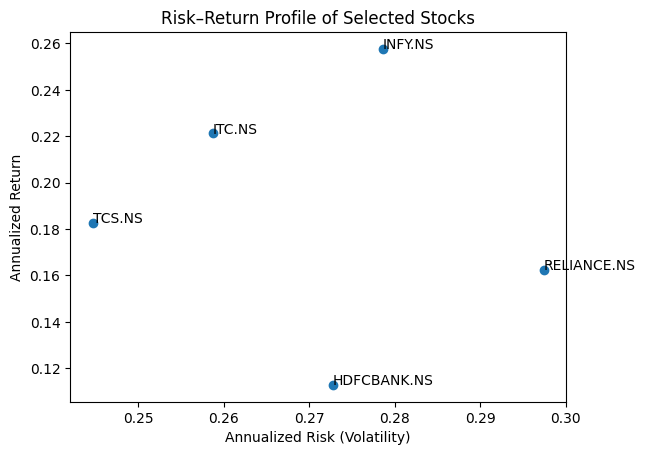

In [22]:
plt.figure()
plt.scatter(annualized_risk, annualized_return)
for stock in annualized_return.index:
    plt.text(annualized_risk[stock], annualized_return[stock], stock)
plt.xlabel("Annualized Risk (Volatility)")
plt.ylabel("Annualized Return")
plt.title("Risk–Return Profile of Selected Stocks")
plt.show()

**Explanation:**

**Top Left: Low risk, High Return (ideal)**

**Bottom Right: High risk, Low Return (avoid)**

Correlation Heatmap (Diversification Insights)

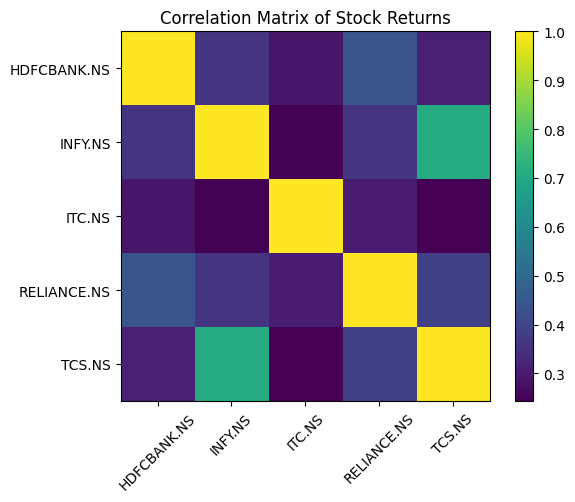

In [23]:
plt.figure()
plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Correlation Matrix of Stock Returns")
plt.show()

**Explanation:**

**Lower Correlation: Better Diversification**

**IT Stocks usally show higher correlation like TCS, Infosys**

Portfolio Daily Return Trend

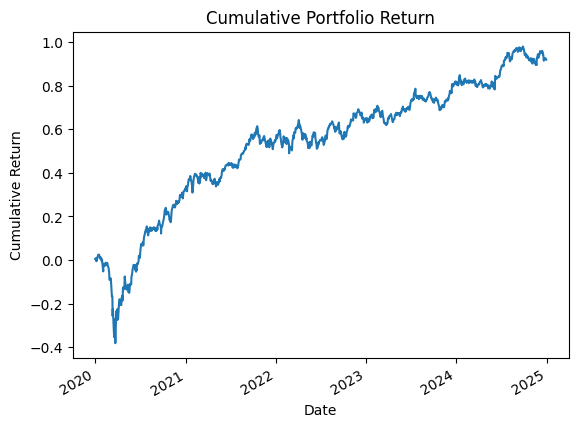

In [24]:
portfolio_daily_return = daily_returns.dot(weights)
plt.figure()
portfolio_daily_return.cumsum().plot()
plt.title("Cumulative Portfolio Return")
plt.ylabel("Cumulative Return")
plt.show()

# **Advanced Analytics**

Value At Risk (VaR~ 95%)

In [25]:
VaR_95 = daily_returns.quantile(0.05)
print("Daily VaR at 95% confidence:\n", VaR_95)

Daily VaR at 95% confidence:
 Ticker
HDFCBANK.NS   -0.024386
INFY.NS       -0.024665
ITC.NS        -0.020613
RELIANCE.NS   -0.024124
TCS.NS        -0.021528
Name: 0.05, dtype: float64


**Explanation:**

**There is a 5% chance the portfolio may lose more than this value in a day.**

Monte Carlo Simulation

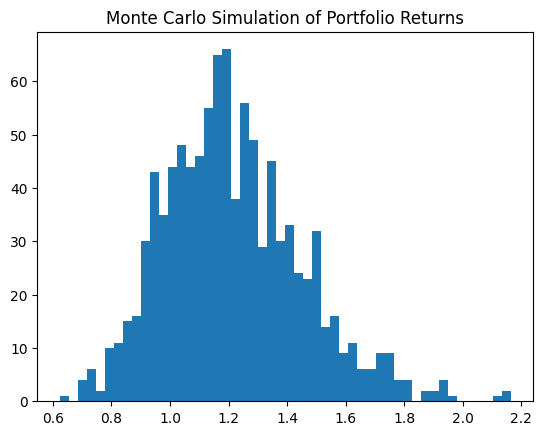

In [26]:
num_simulations = 1000
num_days = 252
mean_return = portfolio_daily_return.mean()
std_return = portfolio_daily_return.std()
simulation_results = []
for i in range(num_simulations):
    simulated_returns = np.random.normal(mean_return, std_return, num_days)
    simulation_results.append(np.prod(1 + simulated_returns))
plt.figure()
plt.hist(simulation_results, bins=50)
plt.title("Monte Carlo Simulation of Portfolio Returns")
plt.show()